In [27]:
from evaluator import FiLMModelEvaluator
from model import FiLMModel
from baseline_concat_model import MLPModel
from utils import *
from dataset import SciplexDatasetUnseenPerturbations
import random

import anndata as ad
import math

In [30]:
drugs_list = list(ad.read_h5ad("../data/sciplex/sciplex_preprocessed.h5ad").obs['product_name'].unique())

In [31]:
def split_list(lst):
    # Calculate the split sizes
    total_len = len(lst)
    split_70 = math.floor(total_len * 0.7)
    split_85 = math.floor(total_len * 0.85)

    # Split the list into three parts
    train = lst[:split_70]    # First 70% (training set)
    val = lst[split_70:split_85]   # Next 15% (validation set)
    test = lst[split_85:]     # Remaining 15% (test set)

    return train, val, test


random.shuffle(drugs_list)
train_drugs, validation_drugs, test_drugs = split_list(drugs_list)

test_drugs.extend(validation_drugs)

In [32]:
ad_path = "../data/sciplex/sciplex_preprocessed.h5ad"

dataset_train = SciplexDatasetUnseenPerturbations(ad_path, train_drugs, 10000)
dataset_validation = SciplexDatasetUnseenPerturbations(ad_path, validation_drugs, 10000)
dataset_test = SciplexDatasetUnseenPerturbations(ad_path, test_drugs, 10000)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 571906/571906 [00:30<00:00, 18837.84it/s]


In [33]:
evalautor = FiLMModelEvaluator("../config/FiLM.yaml",FiLMModel, dataset_train, dataset_validation, dataset_test)
evalautor.train()
evalautor.test()
results = evalautor.get_test_results()
results = get_model_stats(results)

Begin training ...
Epoch 1/10
Iteration: 10 Test Loss: 0.44176942110061646 Avg. Validation Loss: 0.4284520753120121
Iteration: 20 Test Loss: 0.35161489248275757 Avg. Validation Loss: 0.3469332244835402
Iteration: 30 Test Loss: 0.314880907535553 Avg. Validation Loss: 0.31427850691895737
Iteration: 40 Test Loss: 0.3001614212989807 Avg. Validation Loss: 0.2984224095156318
Iteration: 50 Test Loss: 0.28776657581329346 Avg. Validation Loss: 0.28578423042046397
Iteration: 60 Test Loss: 0.2753036618232727 Avg. Validation Loss: 0.2743954642822868
Iteration: 70 Test Loss: 0.26587989926338196 Avg. Validation Loss: 0.26368647578515503
Iteration: 80 Test Loss: 0.2555590271949768 Avg. Validation Loss: 0.25444179694903524
Iteration: 90 Test Loss: 0.2452385276556015 Avg. Validation Loss: 0.2462494671344757
Iteration: 100 Test Loss: 0.2400338351726532 Avg. Validation Loss: 0.23932835185214094
Iteration: 110 Test Loss: 0.2337377965450287 Avg. Validation Loss: 0.23341187599458194
Iteration: 120 Test Loss

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:01<00:00, 66.28it/s]


Testing completed. Results stored in 'self.test_results'.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:10<00:00,  5.10it/s]


Avg Pred Loss: 0.08210028262980218
Avg Null Loss: 0.10206090454994098
Avg Similarity Loss: 0.03216359738002351


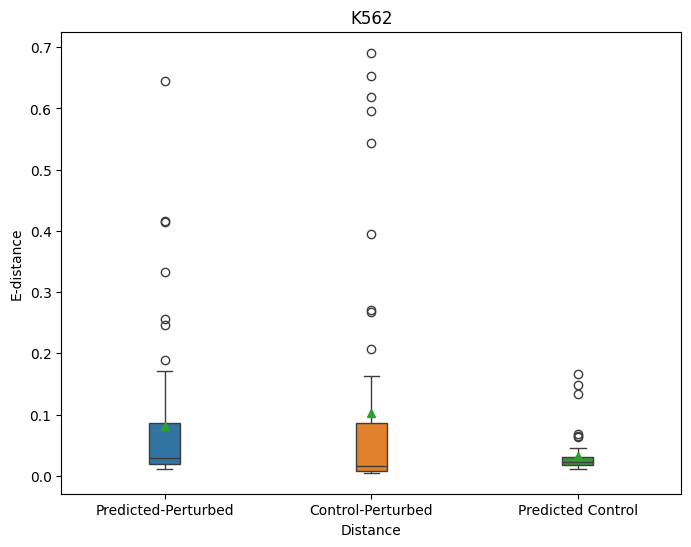

Avg Pred Loss: 0.05233503242848192
Avg Null Loss: 0.07177482212569553
Avg Similarity Loss: 0.028085219018705556


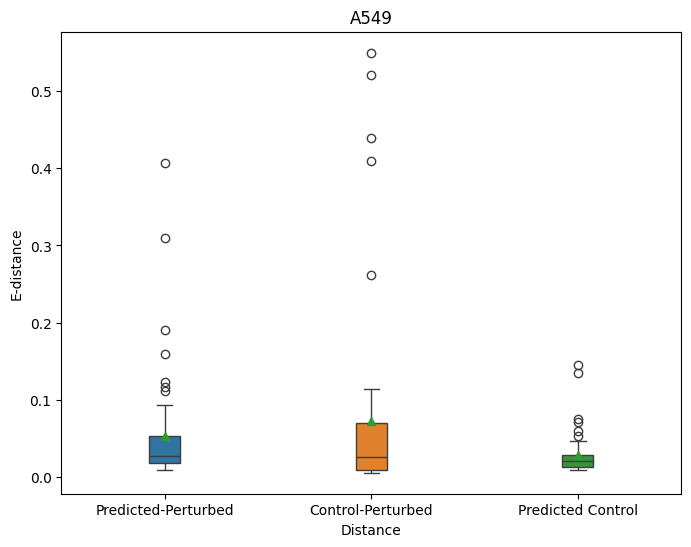

Avg Pred Loss: 0.06002243440958381
Avg Null Loss: 0.07461899751255475
Avg Similarity Loss: 0.02531823334357225


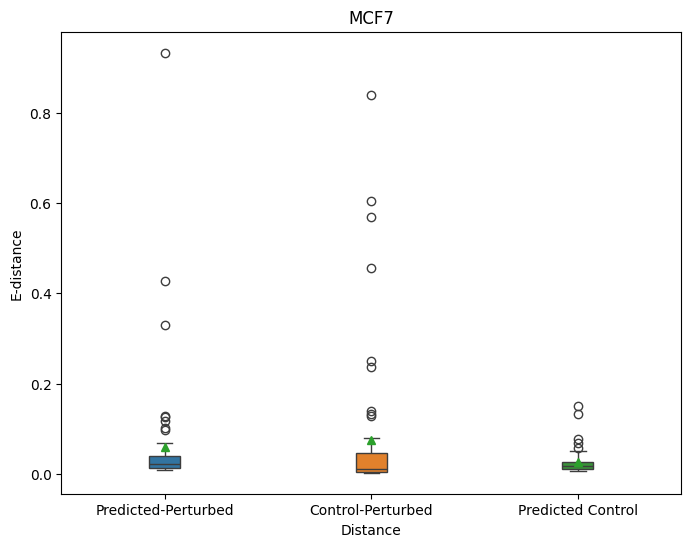

In [34]:
plot_results(results, "K562")
plot_results(results, "A549")
plot_results(results, "MCF7")

In [37]:
evalautor_baseline = FiLMModelEvaluator("../config/baseline.yaml",MLPModel, dataset_train, dataset_validation, dataset_test)
evalautor_baseline.train()
evalautor_baseline.test()
results = evalautor_baseline.get_test_results()
results = get_model_stats(results)

Begin training ...
Epoch 1/5
Iteration: 10 Test Loss: 0.37096697092056274 Avg. Validation Loss: 0.36781434950075653
Iteration: 20 Test Loss: 0.34143149852752686 Avg. Validation Loss: 0.3400308152562694
Iteration: 30 Test Loss: 0.32590818405151367 Avg. Validation Loss: 0.3257560510384409
Iteration: 40 Test Loss: 0.3182719349861145 Avg. Validation Loss: 0.3158717759345707
Iteration: 50 Test Loss: 0.3086121082305908 Avg. Validation Loss: 0.3077860011866218
Iteration: 60 Test Loss: 0.3010808825492859 Avg. Validation Loss: 0.30025800748875264
Iteration: 70 Test Loss: 0.2939671576023102 Avg. Validation Loss: 0.2938759899453113
Iteration: 80 Test Loss: 0.28930506110191345 Avg. Validation Loss: 0.28883670505724457
Iteration: 90 Test Loss: 0.2853904366493225 Avg. Validation Loss: 0.2837183083358564
Iteration: 100 Test Loss: 0.28060001134872437 Avg. Validation Loss: 0.2798711916333751
Iteration: 110 Test Loss: 0.27707982063293457 Avg. Validation Loss: 0.2760588730636396
Iteration: 120 Test Loss:

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:01<00:00, 55.56it/s]


Testing completed. Results stored in 'self.test_results'.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:02<00:00, 21.17it/s]


Avg Pred Loss: 0.09919746520590207
Avg Null Loss: 0.10206090454994098
Avg Similarity Loss: 0.06424751925032339


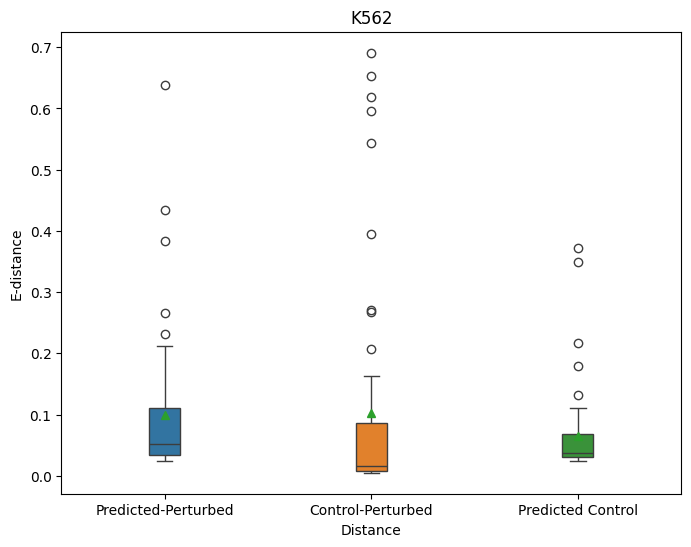

Avg Pred Loss: 0.06130047678396487
Avg Null Loss: 0.07177482212569555
Avg Similarity Loss: 0.05020238797237122


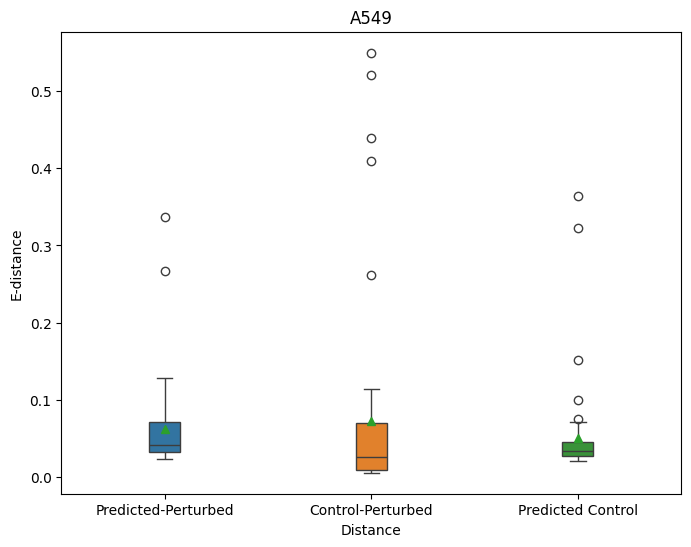

Avg Pred Loss: 0.0840792869297738
Avg Null Loss: 0.07461899751255475
Avg Similarity Loss: 0.08386585472333759


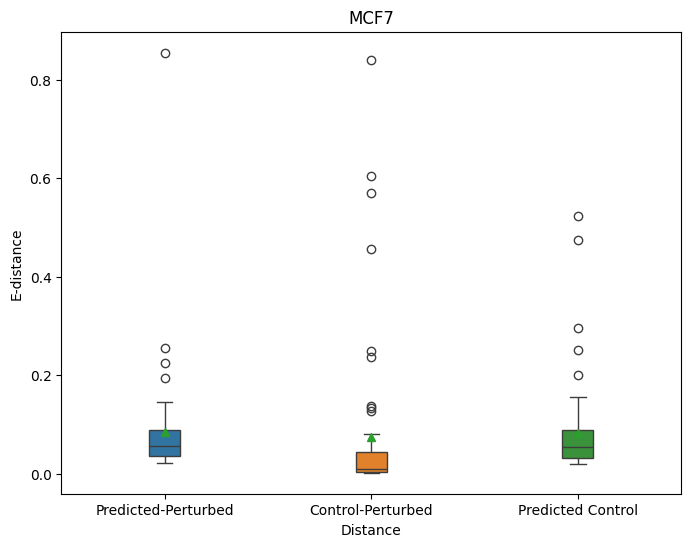

In [38]:
plot_results(results, "K562")
plot_results(results, "A549")
plot_results(results, "MCF7")

In [9]:
results = evalautor.get_test_results()

In [10]:
results

,ctrl_emb,pert_emb,pred_emb,compound,cell_type
0,"[0.0033392496, 0.0028286092, 0.017892146, -0.0...","[-0.021655548, -0.0072223013, 0.02499467, -0.0...","[-0.01643465, -0.01752428, 0.022641767, -0.002...",Resveratrol,MCF7
1,"[-0.01273163, 0.02232865, 0.02638934, 0.002000...","[0.011855226, 0.0150056835, -0.009123043, 0.00...","[0.014653282, 0.00087025925, 0.00024073361, -0...",Carmofur,K562
2,"[-0.003904643, -0.003583357, 0.016697131, 0.02...","[-0.020421375, -0.019243106, -0.005501745, 0.0...","[-0.012701931, -0.007767089, 0.005825196, 0.03...",PF-3845,A549
3,"[-0.026147516, -0.009152404, -0.0078490395, 0....","[-0.005543858, 0.0023359489, -0.002349611, 0.0...","[-0.00747237, -0.002852163, -1.174584e-05, 0.0...",AZ 960,A549
4,"[0.037806, -0.0030074755, -0.0019844368, -0.00...","[0.029068066, -0.006932245, 0.0023746723, -0.0...","[0.016714692, 0.0038417534, -1.5347963e-05, -0...","Cerdulatinib (PRT062070, PRT2070)",K562
...,...,...,...,...,...
18584,"[0.024503808, -0.0013192083, 0.0075374776, 0.0...","[0.028792584, -0.037484255, 0.012958955, -0.01...","[0.017477822, 0.0048950515, -0.00087490235, -0...",AZ 960,K562
18585,"[-0.014878379, 0.003194114, 0.03952782, -0.017...","[-0.011872256, 0.0013056034, 0.039745424, 0.02...","[-0.015299208, -0.016237414, 0.022683546, -0.0...",Epothilone A,MCF7
18586,"[0.0071891155, -0.009411869, -0.0056021493, 0....","[-0.008593221, 0.01488876, -0.002793862, 0.047...","[-0.011024075, -0.0072877803, 0.0017764851, 0....",Andarine,A549
18587,"[0.019228553, 0.039747592, -0.0008259608, 0.01...","[-0.010537039, -0.045852594, -0.004017843, 0.0...","[0.013490801, 0.0011262667, 0.0024143518, -0.0...",Thiotepa,K562


<Figure size 1200x800 with 0 Axes>

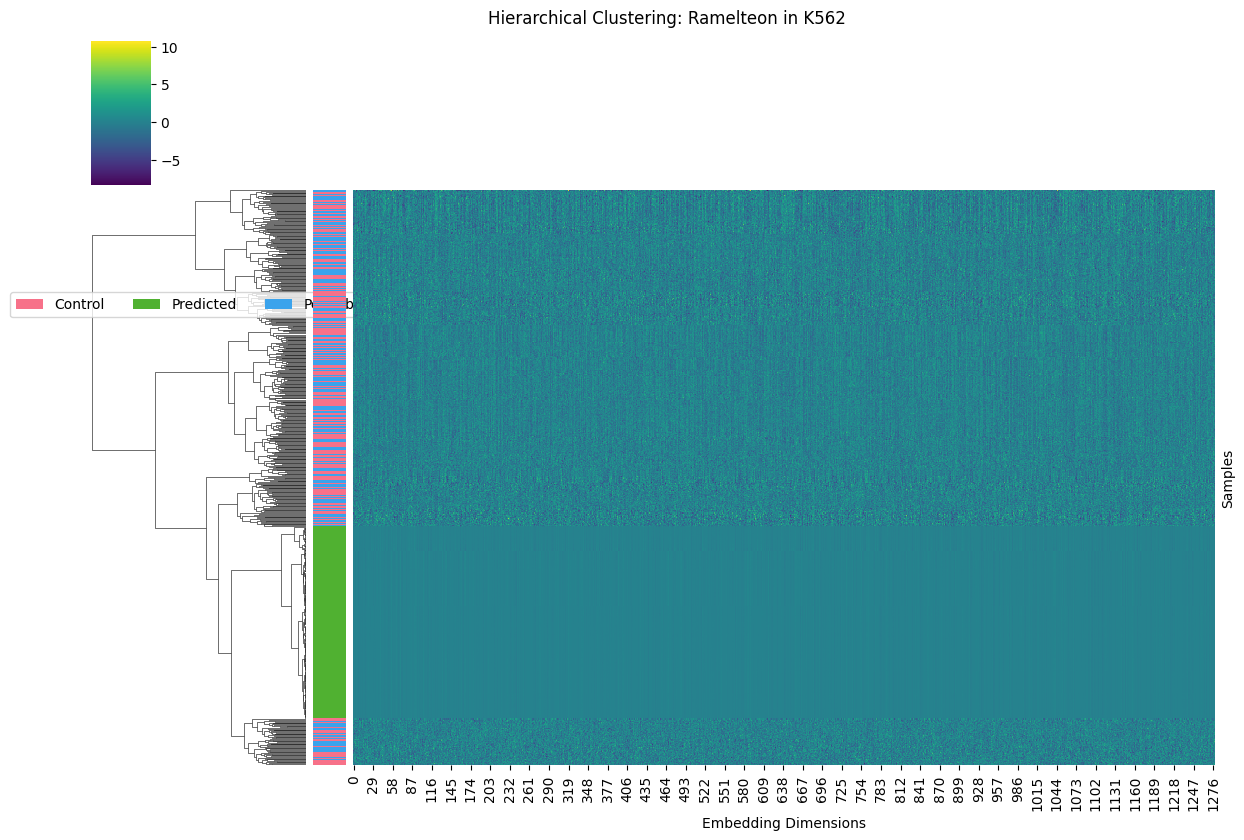

In [11]:
plot_compound_clustering(results, "Ramelteon", "K562", metric='euclidean', method='ward')

In [28]:
results

,ctrl_emb,pert_emb,pred_emb,compound,cell_type
0,"[-0.004407348, 0.0065143867, -0.024181807, -0....","[-0.031270977, 0.02117755, 0.013497196, 0.0176...","[0.016665848, 0.0011348422, -0.0005713301, 0.0...",Costunolide,K562
1,"[-0.012848266, -0.0107962, 0.028041856, 0.0015...","[-0.027570512, -0.012498518, 0.049611643, 0.04...","[-0.011219388, -0.014324631, 0.020398898, -0.0...",Epothilone A,MCF7
2,"[-0.029635783, -0.02289452, 0.039602067, -0.01...","[-0.017326351, -0.025996342, 0.034360927, 0.01...","[-0.015170159, -0.017550431, 0.024017353, -0.0...",Ramelteon,MCF7
3,"[0.032784123, -0.00251585, 0.0030593907, -0.01...","[0.027863879, 0.010938368, 0.005388813, -0.005...","[0.013958091, -5.4349453e-05, 0.004059826, 0.0...",PF-3845,K562
4,"[0.0009167644, -0.0024126077, 0.0364257, -0.00...","[-0.0047241068, -0.012706184, 0.009822599, -0....","[-0.01615577, -0.019103719, 0.024408411, -0.00...",Anacardic Acid,MCF7
...,...,...,...,...,...
18584,"[-0.0014918711, 0.006964933, 2.1629818e-05, 0....","[0.020249804, -0.0041274144, -0.0025928293, 0....","[0.007185615, -0.00551085, 0.010247288, 0.0100...",Tubastatin A HCl,K562
18585,"[0.0038384192, -0.03679225, 0.06165308, -0.036...","[-0.016681975, -0.007541284, 0.0020245817, 0.0...","[0.013576111, -0.0011950961, 0.0015957132, 0.0...",SRT2104 (GSK2245840),K562
18586,"[0.018975368, -0.021060256, 0.0071231173, -0.0...","[0.0053346604, 0.014963197, 0.027438587, 0.002...","[0.0187416, 0.0036322381, -0.0005425103, -0.00...",AZ 960,K562
18587,"[-0.018585676, -0.008779773, 0.023379434, 0.01...","[-0.00074400695, -0.0065336116, -0.000957463, ...","[-0.0058058994, -0.006247, 0.0022042394, 0.022...",Carmofur,A549
